<a href="https://colab.research.google.com/github/davidofitaly/05_decision_tree_regression_projects/blob/main/02_diabetes_level_decision_tree_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data loading](#1)
3. [Data description](#2)
4. [Create a copy data](#3)
5. [Data mining and preprocessing](#4)
6. [Correlation](#5)
7. [Division of data into training and test collection](#6)
8. [Regression of decision trees](#7)
9. [Model evaluation - with best parametres](#8)


### <a name='0'> </a> Import of libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


np.set_printoptions(precision=4, suppress=True)

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)
np.random.seed(42)

# Print the version of the imported libraries for refernece
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.2.2
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


### <a name='1'> </a> Data loading

In [2]:
# Import load_diabetes
from sklearn.datasets import load_diabetes

# Load diabetes data and create DataFrame and add target(price)
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['diabetes_level'] = diabetes.target

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### <a name ='2'> </a> Data description

- **age**: This variable represents the normalized age of the individual. It is typically measured in years and normalized to have a mean of 0 and a standard deviation of 1.

- **sex**: This variable indicates the sex of the individual, often encoded as 0 (female) and 1 (male). Normalization here is intended to adjust the influence of sex on diabetes risk.

- **bmi**: This is the Body Mass Index, a measure of body fat based on height and weight. It is normalized to allow comparison across different body types and sizes.

- **bp**: This variable represents blood pressure, usually recorded in mmHg. Normalizing blood pressure helps in assessing its impact on diabetes risk.

- **s1 - s6**: These variables are derived from specific blood serum measurements. Each variable captures different aspects of blood serum concentration of specific substances, normalized for comparative analysis:
  - **s1**: Serum measurement 1
  - **s2**: Serum measurement 2
  - **s3**: Serum measurement 3
  - **s4**: Serum measurement 4
  - **s5**: Serum measurement 5
  - **s6**: Serum measurement 6

- **diabetes_level**: This is the target variable, representing the level of diabetes measured in a standardized manner. The values typically indicate the severity of diabetes, with higher values suggesting a greater severity.




###  <a name='3'> </a> Create a copy data

In [3]:
# Create a copy of the DataFrame

df = diabetes_df.copy()

# Display DataFrame information (columns, data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             442 non-null    float64
 1   sex             442 non-null    float64
 2   bmi             442 non-null    float64
 3   bp              442 non-null    float64
 4   s1              442 non-null    float64
 5   s2              442 non-null    float64
 6   s3              442 non-null    float64
 7   s4              442 non-null    float64
 8   s5              442 non-null    float64
 9   s6              442 non-null    float64
 10  diabetes_level  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### <a name='4'></a> Data mining and preprocessing

- Duplicates

In [4]:
# Show rows that are duplicates
df[df.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_level


- Missing values

In [5]:
# Count the number of missing (null) values in each column

df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


- Describe data

In [6]:
# Show summary statistics, transposed for better readability

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


- Data Distribution

<Axes: ylabel='Frequency'>

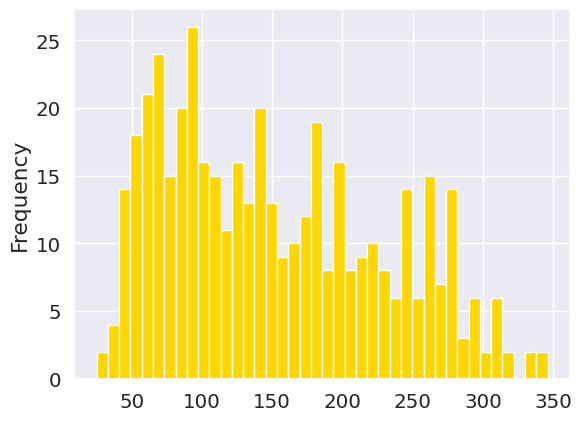

In [7]:
# Plot a histogram of the 'diabetes_level' with 40 bins and gold color

df.diabetes_level.plot(kind='hist', bins=40, color='gold')

<Axes: ylabel='Frequency'>

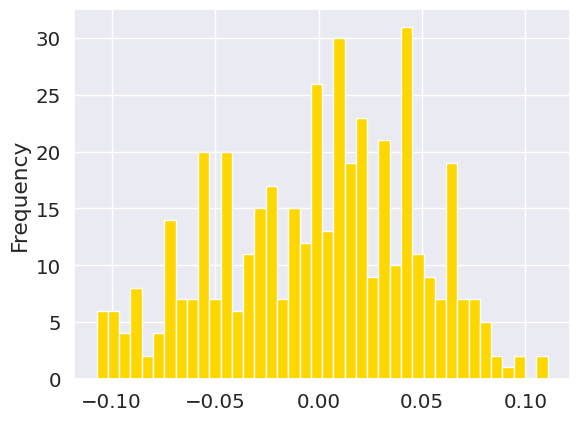

In [8]:
# Plot a histogram of the 'age' with 40 bins and gold color
df.age.plot(kind='hist', bins=40, color='gold')

<Axes: ylabel='Frequency'>

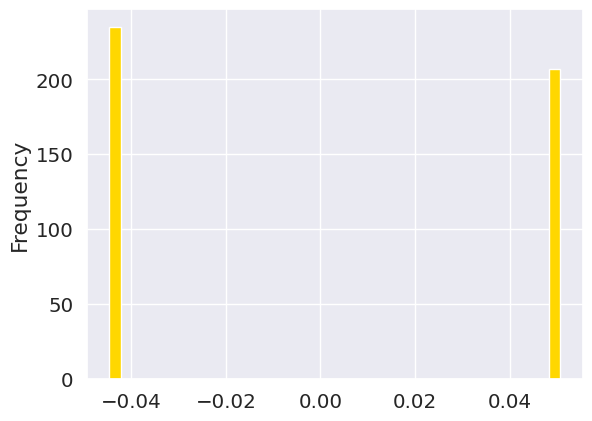

In [9]:
# Plot a histogram of the 'sex' with 40 bins and gold color
df.sex.plot(kind='hist', bins=40, color='gold')

<Axes: ylabel='Frequency'>

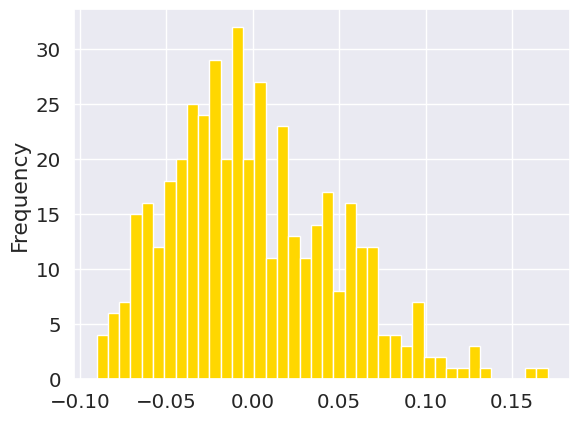

In [10]:
# Plot a histogram of the 'bmi' with 40 bins and gold color
df.bmi.plot(kind='hist', bins=40, color='gold')

### <a name='5' a> </a> Correlation

In [11]:
# Calculate the correlation matrix for the DataFrame

corr = df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_level
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Text(0.5, 1.0, 'Correlation Heatmap')

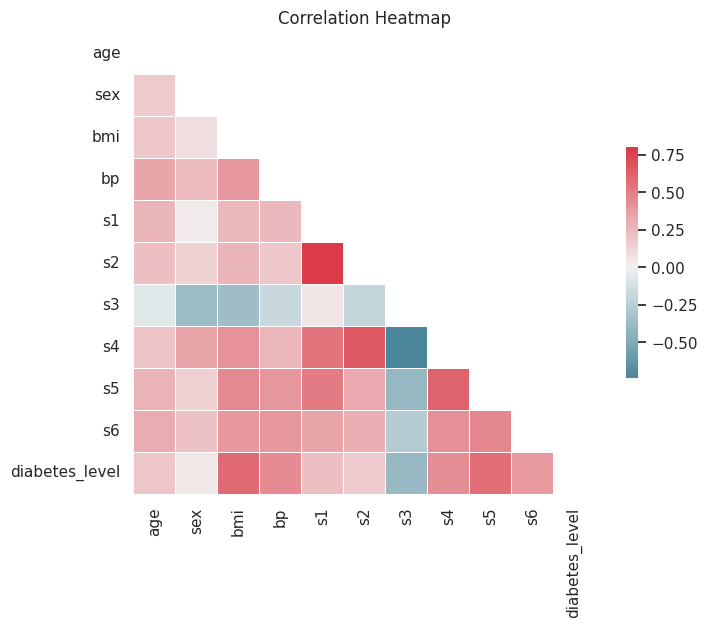

In [12]:
sns.set(style="white")  # Set the style for seaborn plots to 'white'
mask = np.zeros_like(corr, dtype=bool)  # Create a mask for the upper triangle of the correlation matrix
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6)) # Create fiure and axis with specified size
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Create a diverging color palette
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw a heatmap with the correlation matrix
plt.title('Correlation Heatmap') # Set the title of the heatmap

In [13]:
# Calculate and sort the correlation of all features with 'diabetes_level' in descending order

df.corr()['diabetes_level'].sort_values(ascending=False)

,diabetes_level
diabetes_level,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


<Axes: >

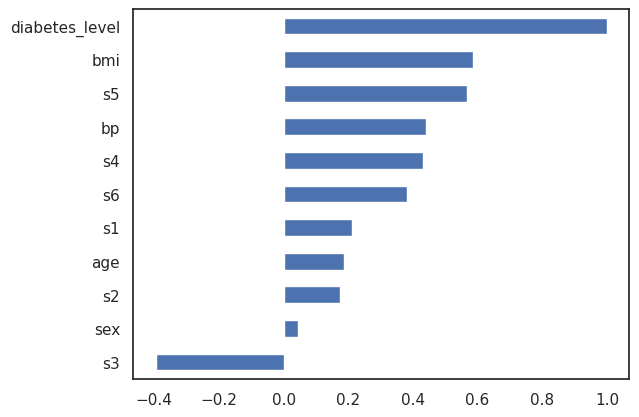

In [14]:
# Calculate and sort the correlation of all features with 'diabetes_level', sort them, and plot as a hirozontal bar chart

df.corr()['diabetes_level'].sort_values().plot(kind='barh')

In [15]:
# Create a copy of the DataFrame
data = df.copy()

# Remove the 'Price' column from data and store it as the target variable
target = data.pop('diabetes_level')

data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [16]:
# Display the first 5 rows of the target variable (Price)
target.head()

,diabetes_level
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


### <a name='6'> </a> Division of data into training and test collection

In [17]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Print the shape of each set to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


### <a name='7'> </a> Regression of decision trees

In [18]:
# Import DecisionTreeRegressor function from sklearn
from sklearn.tree import DecisionTreeRegressor

# Initialize a Decision Tree regressor and fit it to the training data
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(X_train, y_train)


DecisionTreeRegressor()

In [19]:
regressor_tree.score(X_test, y_test)

0.07434754159611467

In [20]:
y_pred = regressor_tree.predict(X_test)

y_pred

array([190.,  99., 170., 192., 139.,  92., 233., 262., 206., 174.,  90.,
       200.,  74., 220.,  86.,  60., 310., 279., 293., 163., 141.,  59.,
        49., 150.,  90., 127., 281., 162.,  59., 183., 128.,  55., 276.,
       292., 164., 180.,  51.,  94., 190.,  96.,  39., 109., 219., 131.,
       170.,  96.,  59., 148.,  45., 206., 142.,  96., 144., 148., 248.,
       141.,  57., 221.,  53.,  59.,  67., 141., 113., 109., 151., 236.,
        58., 134., 150., 206., 206., 283., 241., 162., 132., 292., 220.,
       178., 111., 292.,  49.,  25.,  59.,  39.,  49.,  52.,  74.,  74.,
       147.])

In [21]:
predict = pd.DataFrame(data={
    'y_true': y_test,
    'y_pred': y_pred,
})

predict.head()

,y_true,y_pred
287,219.0,190.0
211,70.0,99.0
72,202.0,170.0
321,230.0,192.0
73,111.0,139.0


Text(0, 0.5, 'Diabetes Level')

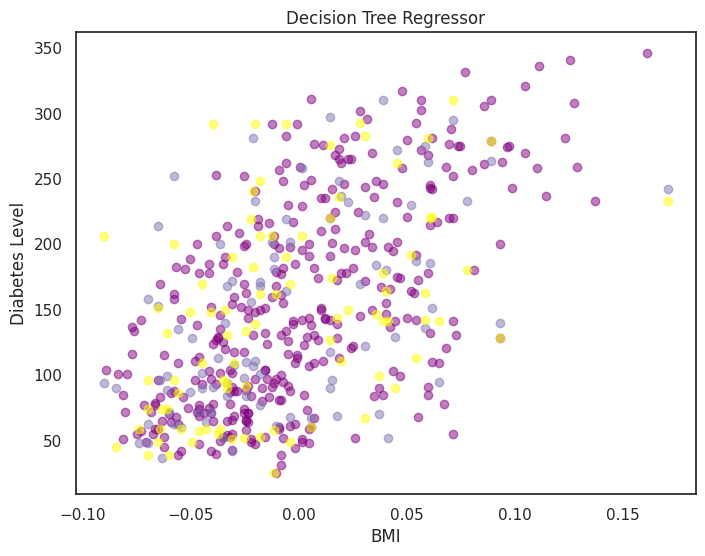

In [22]:
plt.figure(figsize=(8,6))
plt.title('Decision Tree Regressor')
plt.scatter(X_train['bmi'], y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test['bmi'], y_test, label='feature test collection', color='m', alpha=0.5)
plt.scatter(X_test['bmi'], y_pred, label='Predictions', color='yellow', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Diabetes Level')

In [23]:
from sklearn.model_selection import GridSearchCV
params= {
       "max_depth": [6,8,10,12,15],
       "min_samples_split":[10,50,100,150,200],
       "min_samples_leaf":[5,10,20,50]}

dt_cv= DecisionTreeRegressor()
search= GridSearchCV(estimator= dt_cv,param_grid= params, cv=10, n_jobs=-1, verbose= 1,scoring= "neg_mean_squared_error")

search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [24]:
search.best_params_

{'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 10}

In [25]:
search.best_score_

-4003.001203946297

In [26]:
regressor_tree_best= DecisionTreeRegressor(max_depth=6, min_samples_leaf=50, min_samples_split=10)

regressor_tree_best.fit(X_train, y_train)


regressor_tree_best.score(X_test, y_test)

0.37620174238453985

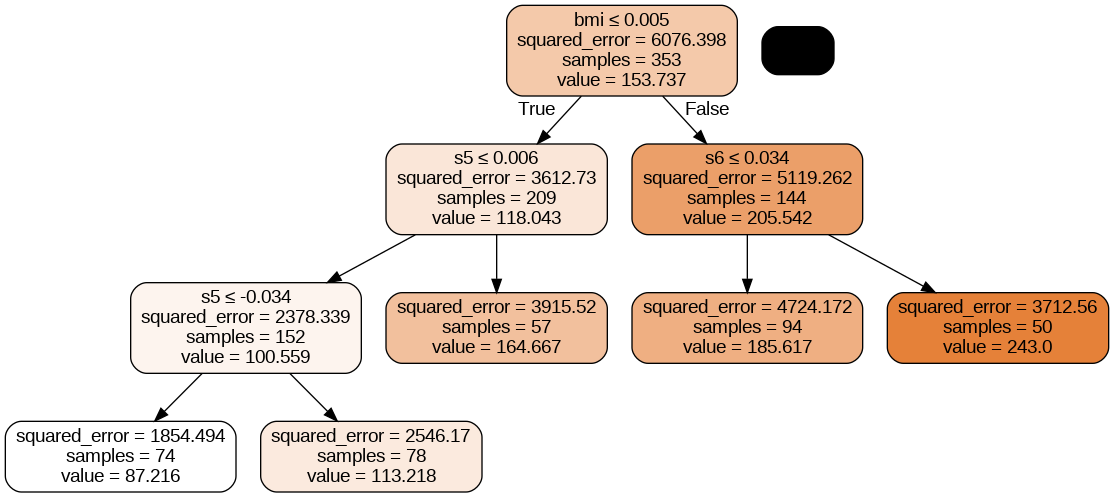

In [29]:
from sklearn.tree import export_graphviz
from io import StringIO  # Change import for compatibility
from IPython.display import Image
import pydotplus

# Create a StringIO object to hold the DOT data
dot_data = StringIO()
# Export the decision tree to DOT format
export_graphviz(regressor_tree_best,  # Use your best model here
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=X_train.columns.tolist())  # Ensure you have the correct feature names

# Generate the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG file
graph.write_png('graph.png')

# Display the image with a specified width
Image(graph.create_png(), width=800)  # Adjust width as needed


### <a name='8'> </a> Model evaluation - with best parametres

- Predictions

In [31]:
# Generate predictions for the test set using the trained tree decision regression model
y_pred_best = regressor_tree_best.predict(X_test)

# Create a DataFrame to compare the true values with the predicted values
predictions = pd.DataFrame(data= {'y_true': y_test, 'y_pred_best': y_pred_best})
predictions.head()

,y_true,y_pred_best
287,219.0,164.666667
211,70.0,185.617021
72,202.0,164.666667
321,230.0,243.000000
73,111.0,113.217949


In [34]:
# Calculate the prediction error as the difference between the true and predicted values
predictions['error'] = predictions['y_true'] - predictions['y_pred_best']
predictions.head()

,y_true,y_pred_best,error
287,219.0,164.666667,54.333333
211,70.0,185.617021,-115.617021
72,202.0,164.666667,37.333333
321,230.0,243.000000,-13.000000
73,111.0,113.217949,-2.217949


In [35]:
# Calculate the prediction error as the difference between the true and predicted values
predictions['error_squared'] = predictions['error'] **2
predictions.head()

,y_true,y_pred_best,error,error_squared
287,219.0,164.666667,54.333333,2952.111111
211,70.0,185.617021,-115.617021,13367.295609
72,202.0,164.666667,37.333333,1393.777778
321,230.0,243.000000,-13.000000,169.000000
73,111.0,113.217949,-2.217949,4.919297


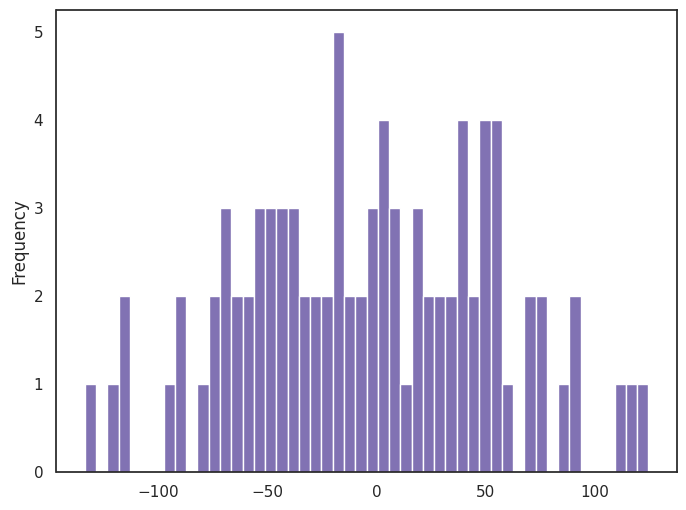

In [36]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

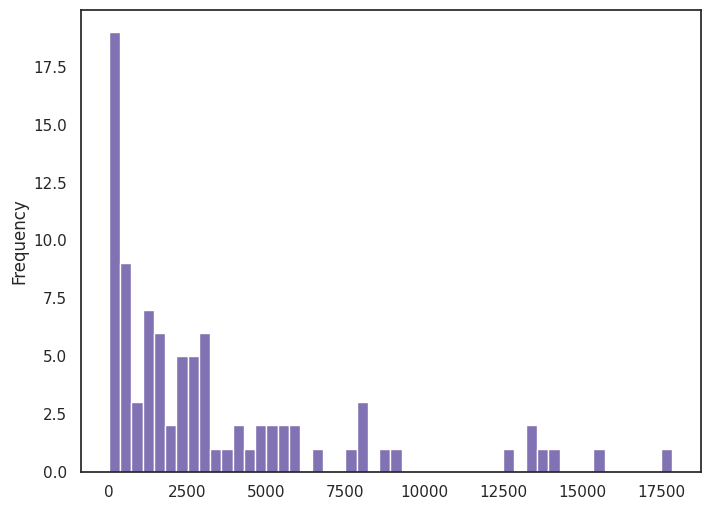

In [37]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

- Mean Absolute Error

In [38]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_best)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_best):.3f}")

The model makes an average error of 47.340


- Mean Squared Error

In [39]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_best)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_best):.3f}')

The mean squared error of the model is: 3304.978


- Root Mean Squared Error - RMSE

In [41]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 57.489


- Max Error

In [42]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_best)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 133.617


- R2 score - coefficient of determination

In [43]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_best)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.376
